In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
#Configuring Settings
pd.set_option("mode.copy_on_write", True)
pd.set_option("display.max_colwidth",200)

In [3]:
# Downloading the datasets
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Importing the dataset
df = pd.read_csv("../../01_Data/01_Raw/raw_tweets.csv")
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
16524,16903,3,0,3,0,1,"RT @MrLuckyToYou: If that pussy good, umma moan when um eating it."
14709,15061,3,2,1,0,0,RT @ClassicBray: Lmaoo RT @PacDaGoat: That's a legal tackle faggot RT @PP_Rich_Hill: Seriously? http://t.co/guMZewrpy3
15547,15912,6,0,6,0,1,RT @Huntermoore: RETWEET if you fucked someone's bitch
23791,24286,3,0,3,0,1,eli manning looks like a idiot when he's talking to the guys on the sideline with his hands up . like retarded af
23185,23669,3,2,1,0,0,Yo bitch on my dick she come to my crib she get passed around no love


In [5]:
# Dropping the columns that are not needed
df = df[["class", "tweet"]]
df.sample(5)

,class,tweet
799,0,#WestVirginia is full of white trash.
9840,1,Hmm RT @IceJJFish: Every bitch i fucked wit is a hoe never met a real female in my life
7697,2,Am ghetto http://t.co/kgu2SePIQZ
15933,1,RT @KINGof334MOBB: Skinny girls pussy be good den a mf u don't feel nothing but pussy. + 100 points on the board for skinny girls.
9736,2,"He never replied to my asking about his calling me a ""redneck"" @gigg423 @psherm07 @EchoesErrant @jstines3"


In [6]:
#get rows which have https in tweet
df.loc[df["tweet"].str.contains("https", na=False)].sample(5)

,class,tweet
17783,1,RT @TinkkBaddAss: Bouta take a shower just to fuck yo bitch https://t.co/7WQ5QZsIls
18044,1,RT @WeLoveKi: Hol on bitch &#128553;&#128514;&#128557; https://t.co/RYESvYaI2u
17669,2,RT @TheFunnyVines: Crazy bird https://t.co/XuvE34qenH
15475,1,RT @HiDevon_: The nae nae got to the white ppl it's too late &#128553; &#8220;@ayoTeeshh: Lmao they ate this hoe stonnaaaaa &#128535;&#128168;&#127809;&#127811;&#127810; #NaeNae https://t.co/pn&#8...
22721,1,When niggas gimme their mixtape and it's trash #YEET #Fatality https://t.co/i3drCdIvN8


In [7]:
df.iloc[12955, :]

class                                                                                                                                             1
tweet    My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
Name: 12955, dtype: object

# Data Cleaning Process Starts Here

In [8]:
# create helper colums for cleaning
df["clean_tweet"] = df["tweet"].astype(str)

In [9]:
# Convert all the text to lower case
df["clean_tweet"] = df["clean_tweet"].str.lower()

In [10]:
# removing URLS
def remove_URL(text):
    text = re.sub(r"http\S+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(remove_URL)

In [11]:
# removing mentions
def remove_mentions(text):
    return re.sub(r"@\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_mentions)

In [12]:
# removing hashtags
def remove_hashtags(text):
    return re.sub(r"#\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_hashtags)

In [13]:
# removing special characters and numbers
spl_chrs = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"


def remove_spl_chrs(text):
    text = "".join([_ for _ in text if _ not in spl_chrs])
    text = re.sub("[0-9]+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(lambda x: remove_spl_chrs(x))

In [14]:
# removing stopwords
stop = stopwords.words("english")
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

In [15]:
# removing retweet
def remove_rt(text):
    return re.sub("^[rt]+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_rt)

In [16]:
df["tokenized"] = df["clean_tweet"].apply(word_tokenize)

In [17]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
12206,1,Karmas a bitch I guess you should of loved the old me.,karmas bitch guess loved old,"[karmas, bitch, guess, loved, old]"
647,0,"""poor whitey"" http://t.co/3UkKeyznz8",poor whitey,"[poor, whitey]"
20702,1,Shaved pussy ho gets serious anal sex&#160;here! http://t.co/ECvvmwfh88,shaved pussy ho gets serious anal sexhere,"[shaved, pussy, ho, gets, serious, anal, sexhere]"
21093,2,"Sometimes, even I gotta tell these hoes to grow up smh",sometimes even gotta tell hoes grow smh,"[sometimes, even, got, ta, tell, hoes, grow, smh]"
5246,1,@ZELNO96 Someone told me cuz some ppl like to use it as bitch some females don't like being calles female but meh *shrugs*,someone told cuz ppl like use bitch females dont like calles female meh shrugs,"[someone, told, cuz, ppl, like, use, bitch, females, dont, like, calles, female, meh, shrugs]"


In [18]:
#Confirm if HTTPs are removed
df.iloc[12955,:]

class                                                                                                                                                   1
tweet          My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
clean_tweet                                                                baby lexy whole aint shit bitch winter sorry ass rwd thats flaw still love tho
tokenized                                                  [baby, lexy, whole, aint, shit, bitch, winter, sorry, ass, rwd, thats, flaw, still, love, tho]
Name: 12955, dtype: object

# Data Stemming and Lematization

In [19]:
# Stemming
ps = nltk.PorterStemmer()


def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: stemming(x))

In [20]:
# Lemmatization
wn = nltk.WordNetLemmatizer()


def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: lemmatizer(x))

In [21]:
# regenrate the clean tweet
def regen_tweet(text):
    return " ".join(text)
df["clean_tweet"] = df["tokenized"].apply(lambda x: regen_tweet(x))

In [22]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
11154,1,I'd rather be at school improving my life than sleeping at home #im #back #bitch,id rather school improv life sleep home,"[id, rather, school, improv, life, sleep, home]"
5722,2,"@charliesheen Charlie, im an old lady. don't EVER SAY UGLY THINGS ABOUT UR CHILDRENS MOM.. I GET IT!!!, JUS DONT! BIG HUG",charli im old ladi dont ever say ugli thing ur child mom get ju dont big hug,"[charli, im, old, ladi, dont, ever, say, ugli, thing, ur, child, mom, get, ju, dont, big, hug]"
11385,1,I'm so faded my nigga I'm about to disappear in this bitch,im fade nigga im disappear bitch,"[im, fade, nigga, im, disappear, bitch]"
4648,1,"@SavageSaiyan4 Real shit, that light armor is a bitch to find tho",eal shit light armor bitch find tho,"[eal, shit, light, armor, bitch, find, tho]"
2662,1,@BradMich4Real thats shit gon be the death of these hoes...ion like it...,hat shit gon death hoesion like,"[hat, shit, gon, death, hoesion, like]"


# Data Selection

In [23]:
# Dropping category 0 from the dataset since it has low values as seen in the EDA
df = df[df["class"] != 0]

In [24]:
df["Length"] = df["tokenized"].apply(len)

In [25]:
# Dropping tweets with 0 length
df = df[df["Length"] != 0]

In [26]:
# Generating simple label for easy identification
df["offensive"] = df["class"].apply(lambda x: "Yes" if x == 1 else "No")

In [27]:
df.sample(5)

,class,tweet,clean_tweet,tokenized,Length,offensive
14413,1,RT @BlackRichyRich: Every nigga\nNew hoe is \nDa next niggas old hoe,everi nigga new hoe da next nigga old hoe,"[everi, nigga, new, hoe, da, next, nigga, old, hoe]",9,Yes
23340,2,"You know I'm not big on the NFL, but I'm so sick of hearing all of this ""Black and yellow"" shit. LOL @ bandwagon fans and hell, GO PACKERS!",know im big nfl im sick hear black yellow shit lol bandwagon fan hell go packer,"[know, im, big, nfl, im, sick, hear, black, yellow, shit, lol, bandwagon, fan, hell, go, packer]",16,No
2894,1,@Coosie11 bitch my phones gonna die in serious I got hot pockets,bitch phone gon na die seriou got hot pocket,"[bitch, phone, gon, na, die, seriou, got, hot, pocket]",9,Yes
24117,1,jesus christ youre a fucking retard if you believe in Mercurian retrograde affecting your life,jesu christ your fuck retard believ mercurian retrograd affect life,"[jesu, christ, your, fuck, retard, believ, mercurian, retrograd, affect, life]",10,Yes
13924,1,Puig had zero lines and yet he's still going to fuck your bitch after that appearance,puig zero line yet he still go fuck bitch appear,"[puig, zero, line, yet, he, still, go, fuck, bitch, appear]",10,Yes


In [28]:
# dropping extra columns
df2 = df[["offensive", "class", "tokenized", "clean_tweet"]]

In [29]:
# View Distribution of the classes
df2["offensive"].value_counts()

offensive
Yes    19181
No      4156
Name: count, dtype: int64

In [30]:
# create a new random sample with 4000 rows from each class
df3 = (
    df2.groupby("offensive")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

In [31]:
df3["offensive"].value_counts()

offensive
No     4000
Yes    4000
Name: count, dtype: int64

In [32]:
df3.sample(5)

,offensive,class,tokenized,clean_tweet
1758,No,2,"[ealli, want, girl, make, browni]",ealli want girl make browni
5548,Yes,1,"[carrah, bitch]",carrah bitch
2482,No,2,"[im, vibe, ask, see, aux, cord, know, bout, play, trash]",im vibe ask see aux cord know bout play trash
5473,Yes,1,"[rt, aint, tryna, see, nigger, leg, bikini]",rt aint tryna see nigger leg bikini
3171,No,2,"[ortilla, trash, though]",ortilla trash though


In [33]:
# Replacing the class labels 2 with 0 for easy use in models
df3["class"] = df3["class"].replace(2, 0)

In [34]:
#confirm the mapping
df3[['class','offensive']].value_counts().reset_index()

,class,offensive,count
0,0,No,4000
1,1,Yes,4000


In [35]:
# Splitting the dataset into train and test sets at 80:20 ratio
train, test = train_test_split(
    df3, test_size=0.20, stratify=df3["offensive"], random_state=42
)

In [36]:
train["offensive"].value_counts()

offensive
Yes    3200
No     3200
Name: count, dtype: int64

In [37]:
test["offensive"].value_counts()

offensive
Yes    800
No     800
Name: count, dtype: int64

In [38]:
# Saving the datasets
train.to_csv("../../01_Data/02_Processed/train.csv", index=False)
test.to_csv("../../01_Data/02_Processed/test.csv", index=False)

# EDA Plots

In [39]:
df2.sample(5)

,offensive,class,tokenized,clean_tweet
18871,Yes,1,"[dog, like, go, tell, em, ate, bitch, as, homework, aint, never, gunna, believ, dumb, as]",dog like go tell em ate bitch as homework aint never gunna believ dumb as
17522,Yes,1,"[im, go, movi, weekend, bffl, bitch, nigga]",im go movi weekend bffl bitch nigga
24211,Yes,1,"[complain, suburban, white, girl, suburban, white, girl, your, bitch, ok, u, liter, prove, point]",complain suburban white girl suburban white girl your bitch ok u liter prove point
17704,Yes,1,"[joke, offend, im, sorri, wont, happen, amp, lie, your, pussi]",joke offend im sorri wont happen amp lie your pussi
370,No,2,"[swear, im, man, easili, easili, behind, austin, nip]",swear im man easili easili behind austin nip


## Length Distributions

In [40]:
#Avregae length of tweets by category
len_no = df[df["offensive"] == "No"]["Length"].mean()
len_yes= df[df["offensive"] == "Yes"]["Length"].mean()

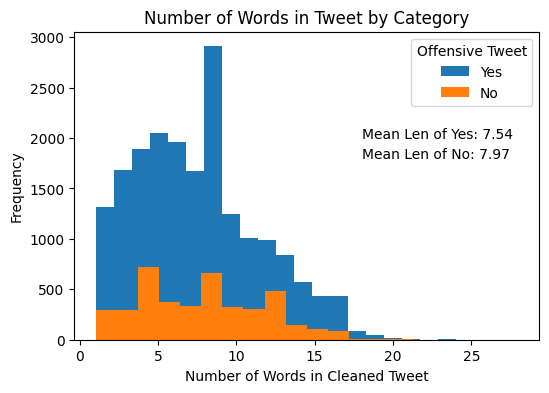

In [41]:
#plotting distrubution of words by category
plt.figure(figsize=(6, 4))
plt.hist(df[df["offensive"] == "Yes"]["Length"], bins=20, label="Yes")
plt.hist(df[df["offensive"] == "No"]["Length"], bins=20, label="No")
plt.title("Number of Words in Tweet by Category")
plt.xlabel("Number of Words in Cleaned Tweet")
plt.ylabel("Frequency")
plt.legend(title="Offensive Tweet")
plt.text(18, 2000, f"Mean Len of Yes: {len_yes:.2f}")
plt.text(18, 1800, f"Mean Len of No: {len_no:.2f}")

#saving the plot
plt.savefig("../../03_Plots/01_EDA/01_Len.png", dpi=300, bbox_inches="tight")

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

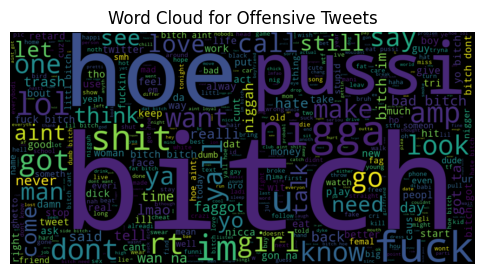

In [42]:
#Word cloud for offensive tweets
plt.figure(figsize=(6,4))
yes_words=' '.join(df2[df2['offensive']=="Yes"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
yes_words=WC.generate(yes_words)
plt.imshow(yes_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/02_WC-yes.png',dpi=300,bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

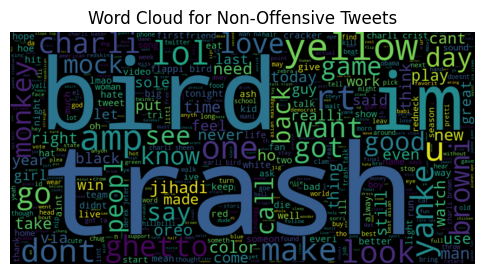

In [43]:
#Word cloud for non-offensive tweets
plt.figure(figsize=(6,4))
no_words=' '.join(df2[df2['offensive']=="No"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
no_words=WC.generate(no_words)
plt.imshow(no_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/03_WC-no.png', dpi=300, bbox_inches='tight')
plt.show

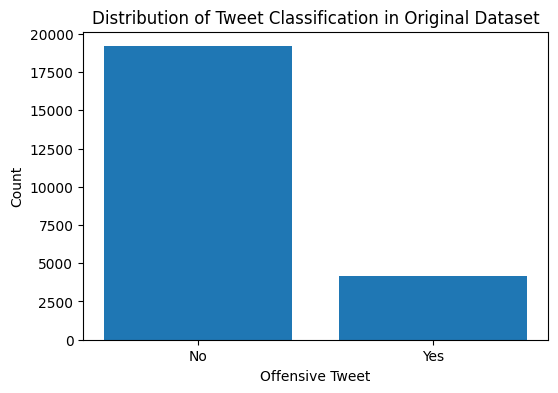

In [44]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df2['offensive'].value_counts().index,df2['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Original Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA/04_orginalClass.png', dpi=300, bbox_inches='tight')
plt.show()

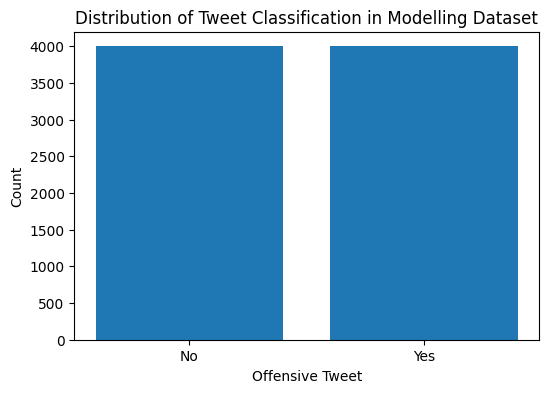

In [45]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df3['offensive'].value_counts().index,df3['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Modelling Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA/05_modelClass.png', dpi=300, bbox_inches='tight')
plt.show()